# Práctica Probabilidad y Estadística

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from math import sqrt

from scipy.stats import t, norm, f_oneway, chi2, kstest
import plotly.express as px

from sympy import Symbol 
from sympy import symbols, diff
from sympy.solvers import solve

from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression


2.14 Script de estimación por máxima verosimilitud

Al igual que con el método de los momentos, para una distribución dada, la forma de estimar
por momentos es siempre la misma. Por ejemplo, para una distribución normal, los parámetros
µ y σ siempre se despejan igual.
Para todas las distribuciones para las que se ha calculado el estimador de máxima verosimilitud, ya sea en clase o en los ejercicios, haz un programa en Python que tome como datos de
entrada una variable que indique el tipo de distribución (de entre aquellas para las que hemos
calculado los estimadores de máxima verosimilitud, ya sea en la parte teórica o en los ejercicios),
y un array numpy que contenga los valores de la muestra y que devuelva la estimación de los
parámetros correspondiente.

In [50]:

def estimacion_maxima_verosimilitud(distribucion, valores_muestra):

    parametros = {}

    if distribucion == 'poisson': #
        return valores_muestra.mean()

    if distribucion == 'normal': #
        media_muestral  = valores_muestra.mean()
        sigma = 0
        for i in valores_muestra:
            sigma += (i - media_muestral)**2
        sigma /= len(valores_muestra)
        return {'mu': media_muestral, 'sigma': sqrt(sigma)}

    if distribucion == 'uniforme':
        return max(valores_muestra)

    if distribucion == 'binomial': #
        return valores_muestra.sum() / (len(valores_muestra) * max(valores_muestra))

    if distribucion == 'geometrica':
        return len(valores_muestra) / valores_muestra.sum()

    if distribucion == 'exponencial': #
        return 1 / valores_muestra.mean()

    if distribucion == 'rayleigh': #
        muestras_al_cuadrado = np.array([x**2 for x in valores_muestra])
        return sqrt(muestras_al_cuadrado.mean()/2)

    if distribucion == 'definida': #
        t = symbols('theta')
        n1, n2, n3, n4 = valores_muestra
        primera_derivada = n1 * (0.25/(0.5 + 0.25 * t)) + n2 * (0.25/(0.25 * t)) \
            - n3 * (0.25/(0.25 - t * 0.25)) - n4 * (0.25/(0.25 - t * 0.25))
        segunda_derivada = diff(primera_derivada, t)
        soluciones_derivada = solve(primera_derivada)

        for solucion in soluciones_derivada:
            if segunda_derivada.subs(t, solucion) < 0:
                   parametros['theta'] = solucion

        return parametros

    return None



print(estimacion_maxima_verosimilitud('definida', np.array([0.5, 0.01, 0.99, 0.7])))

{'theta': 0.00688433667775642}


3.1 Propiedades de chi n cuadrado

Representa en una misma gráfica la función de densidad de χ2n para n = 1, ..., 5. Comprueba
que para n = 1, 2 es monótona decreciente y que para n ≥ 3 alcanza el máximo en n − 2.
Hazlo utilizando matplotlib, luego repite el mismo gráfico con seaborn y finalmente haz
una última versión en plotly.express.


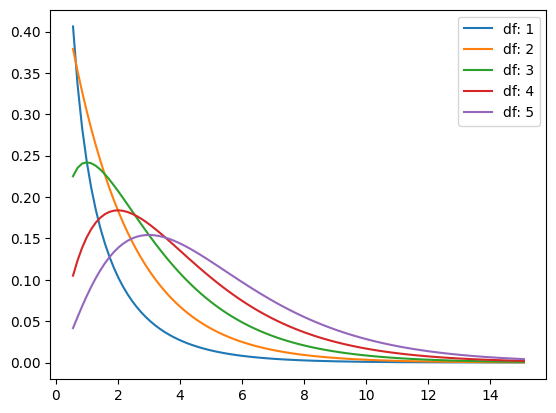

Es monotona decreciente para n = 1:  True
Es monotona decreciente para n = 2:  True
Es monotona decreciente para n = 3:  False
El máximo para 3 se alcanza en  0.9946609371119352 , cumple la condicion:  False
El máximo para 4 se alcanza en  2.022174278007137 , cumple la condicion:  False
El máximo para 5 se alcanza en  3.0496876189023387 , cumple la condicion:  False


In [23]:

lista = range(1, 6)
x = np.linspace(chi2.ppf(0.01, max(lista)),
                chi2.ppf(0.99, max(lista)), 100)
for i in lista:
       plt.plot(x, chi2.pdf(x, df=i), label=f'df: {i}')

plt.legend(loc='best')
plt.show()

def monotona_decreciente(valores):
       for i in range(len(valores) - 1):
              if valores[i] <= valores[i + 1]:
                     return False

       return True

"""
       Comprobamos que efectivamente para n = 1 y par an = 2 la función de densidad de chi cuadrado de grado n es monotona decreciente
"""
print(f"Es monotona decreciente para n = 1: ", monotona_decreciente(chi2.pdf(x, df = 1)))
print(f"Es monotona decreciente para n = 2: ", monotona_decreciente(chi2.pdf(x, df = 2)))
print(f"Es monotona decreciente para n = 3: ", monotona_decreciente(chi2.pdf(x, df = 3)))

def donde_maximo(x, valores):
       indice = valores.argmax()
       return x[indice]

for i in range(3, 6):
       pos = donde_maximo(x, chi2.pdf(x, df = i))
       print(f"El máximo para {i} se alcanza en ", pos, ", cumple la condicion: ", i - 2  == pos)


#  Y REPETIR EN LAS OTRAS LIBRERIAS

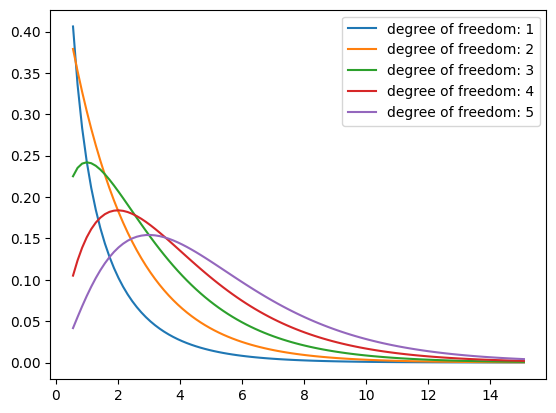

In [24]:
# SEABORN

warnings.filterwarnings('ignore')

for i in lista:
       y = chi2.pdf(x, df=i)
       sns.lineplot(x=x, y=y, label=f'degree of freedom: {i}')


In [25]:

fig = px.line(title='Distribucion chi cuadrado')
for i in lista:
    fig.add_scatter(x=x, y=chi2.pdf(x, df=i), mode='lines', name=i)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig.show()

3.2 Propiedades de tn

Representa en una misma gráfica la función de densidad de tn para n = 1, 2, 5, 10, 30, 100 y la
de N(0, 1).
Comprueba que para todos los valores propuestos es simétrica respecto a x = 0 y tiene
el máximo en ese mismo punto. ¿Es razonable la afirmación de que cuando n → ∞ la tn se
aproxima a la N(0, 1)? ¿Cómo de buena es la aproximación para n = 30?


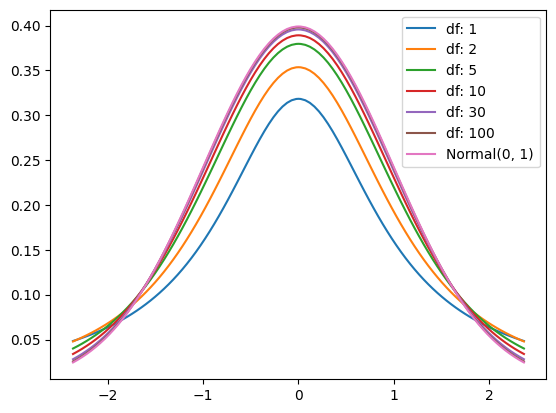

La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  1
La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  2
La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  5
La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  10
La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  30
La función es simétrica respecto al x = 0:  True , tiene maximo en  0.0 para n =  100
El error medio es de 0.003034874637249615


In [26]:


"""
       La distribución t de Students es simétrica respecto a x = 0 y por facilitar el problema al ser simétrica
       y gracias al uso de np.linspace dejando fuera el mismo aŕea por debajo de la gráfica en ambos extremos la x nos sale simétrica también

"""
lista = [1, 2, 5, 10, 30, 100]
x = np.linspace(t.ppf(0.01, max(lista)),
                t.ppf(0.99, max(lista)), 100)

x = np.concatenate((x[x < 0] , [0], x[x > 0]))
x = np.around(x, decimals=6)

for i in lista:
       plt.plot(x, t.pdf(x, df=i), label=f'df: {i}')

plt.plot(x, norm.pdf(x) , label = 'Normal(0, 1)')
plt.legend(loc='best')
plt.show()

def simetrica(x, y):
       x = list(x)
       y = list(y)
       if x == [-x for x in x[::-1]]:
              return y == y[::-1]
       return False


for i in lista:
       y = t.pdf(x, df = i)
       print('La función es simétrica respecto al x = 0: ', simetrica(x, y), ", tiene maximo en ", donde_maximo(x, y), 'para n = ', i)



# Vamos a graficar el porcentaje de error a lo largo de la gráfica
y_30 = t.pdf(x, df = 30)
y_normal = norm.pdf(x)
errores = abs(y_30 - y_normal)

error_medio = errores.sum() / len(x)
error_medio

print(f"El error medio es de {error_medio}")



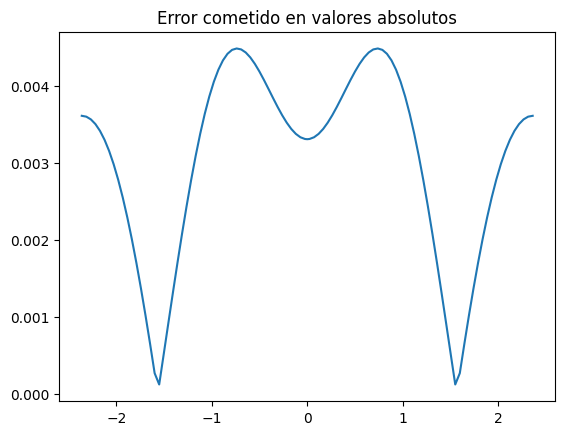

In [27]:
plt.plot(x, errores)
plt.title('Error cometido en valores absolutos')
plt.show()

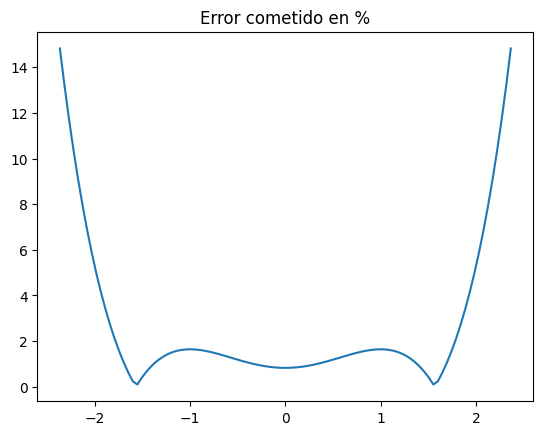

In [28]:
plt.plot(x, errores/ y_normal * 100 )
plt.title('Error cometido en %')
plt.show()

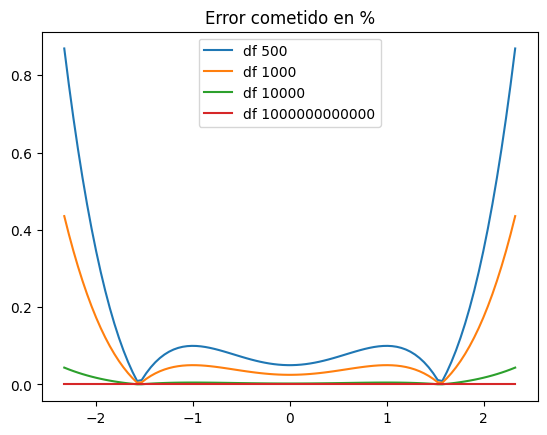

In [29]:
"""
    Podemos afirmar que cuando mayor sea el grado de la distribución de t de studen más se parece a una normal
    y aparte por el teorema del limite central sabemos que se aproxima a una normal
"""

lista = [500, 1000, 10000, 1000000000000]
x = np.linspace(t.ppf(0.01, max(lista)),
                t.ppf(0.99, max(lista)), 100)

x = np.concatenate((x[x < 0] , [0], x[x > 0]))
x = np.around(x, decimals=6)


y_normal = norm.pdf(x)
for i in lista:
    y = t.pdf(x, df = i)
    errores = abs(y - y_normal)
    plt.plot(x, errores/ y_normal * 100 , label = f"df {i}")

plt.title('Error cometido en %')

"""
    A la vista de la gŕafica que muestra ek error cometido en porcentaje comparado con la normal 0, 1 vemos que cuando mayor
    es el grado el error cometido tambien tiene a 0 por tanto podemos afirmar que sí se aproxima bien a una nroma
"""
plt.legend(loc='best')
plt.show()



3.13 Script de simulación de intervalos

Genera una muestra de 100 observaciones tomadas aleatoriamente de una normal de media 10
y desviación típica 2. A partir de la media muestral, calcula el intervalo de confianza para la
media al 90%. ¿Contiene el intervalo de confianza a la media teórica?
Repite este proceso 1000 veces, registrando en cuántas de ellas el intervalo contiene, efectivamente, a la media. ¿Tiene sentido lo que obtienes? Reflexiona las ventajas que puede tener
la simulación en contextos de Ciencia de Datos para los que no hay una teoría como la que
estudiamos este curso.
Representa gráficamente 20 intervalos de los anteriores de la siguiente manera; crea una línea
vertical en el punto donde se halla la media teórica. A alturas 1 a 20 dibuja horizontalmente
cada uno de los intervalos. Representa en distinto color aquellos que no contienen a la media.
Generaliza todo lo realizado en este ejercicio para que se pueda ejecutar como script que
reciba como datos de entrada el número de simulaciones, la media y la desviación típica.

Porcentaje de veces que la media cayó dentro del intervalo de confianza: 0.9299999999999999%


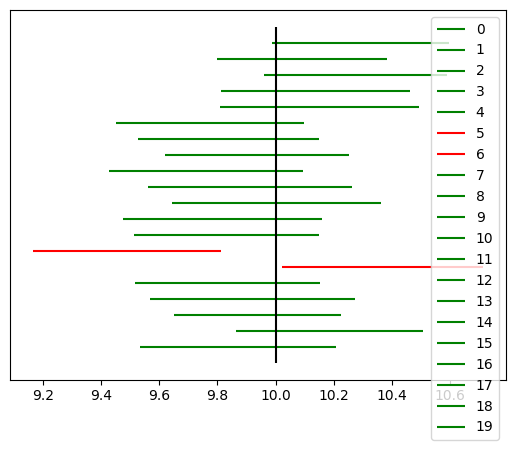

In [30]:

""" 
    El intervalo de confianza no tiene porque contener a la media teórica ya que lo saca a partir de la media_muestral y la desviacion tipica y puede ser que en dicha muestra al sacar el intervalo de confianza no esté incluido

    Tiene sentido lo que obtengo ya que a mayor número de repeticiones que haga el %  de veces que contiene a la media tiende  a la confianza que le he dado

    Nos da como ventaja la posibilidad de de simular en la mejor medida de lo posible el comportamiento de algo del cual no tenemos sufciente conocimiento y podemos tomar decisiones gracias a ello
    
"""

def intervalo_confianza_aleatorio(n, alpha, media = 10, desviacion_tipica = 2):
    muestras = norm(media, desviacion_tipica).rvs(size = n)
    media_muestral = np.mean(muestras)
    # Al ser n >= 100 la distribución de la que parten se aproxima a una tn-1
    probabilidad = 0.5  + alpha/2
    grados_t_student = n - 1
    b = t.ppf(probabilidad, grados_t_student)
    cuasidesviacion_tipica = 0
    for muestra in muestras:
        cuasidesviacion_tipica += (muestra - media_muestral)**2
    cuasidesviacion_tipica = sqrt(cuasidesviacion_tipica / (n - 1))
    margen = b * cuasidesviacion_tipica / sqrt(n)

    intervalo_confianza = [media_muestral - margen, media_muestral + margen]
    return intervalo_confianza


def n_pruebas_intervalo_confianza_aleatorio(num_procesos, n, alpha, media = 10, desviacion_tipica = 2, show = True):
    veces_contiene = 0
    lista_intervalos_confianza = []
    for i in range(num_procesos):
        intervalo_confianza = intervalo_confianza_aleatorio(n, alpha, media, desviacion_tipica)
        if i < 20:
            lista_intervalos_confianza.append(intervalo_confianza)
        if media >= intervalo_confianza[0] and media <= intervalo_confianza[1]:
            veces_contiene += 1

    print(f"Porcentaje de veces que la media cayó dentro del intervalo de confianza: {veces_contiene/(n * num_procesos) * 100}%")

    fig, ax = plt.subplots()

    if show:

        for idx, (min_int, max_int) in enumerate(lista_intervalos_confianza):
            if media >= min_int and media <= max_int:
                ax.hlines(y=idx, xmin=min_int, xmax=max_int, label=idx, colors = 'green')
            else:
                ax.hlines(y=idx, xmin=min_int, xmax=max_int, label=idx, colors = 'red')

        ax.vlines(x = media, ymin=-1, ymax=20, colors = 'black')

    ax.legend()
    plt.yticks([], [])
    plt.show()

n_pruebas_intervalo_confianza_aleatorio(100, 100, 0.9)

5.8 Script completo sobre constrastes

Mejora el script del Ejercicio 4.9: Script para contrastes de la siguiente manera.
Ahora el script ya no debe de tener como dato de entrada la variable sobre la normalidad.
El script deberá realizar un test de K-S para decidir si es normal o no, y en función de eso
continuar, para obtener los mismos resultados

In [31]:
np.std(np.array([90, 95, 95, 95, 95, 100, 100, 105, 105, 105,  105, 110]), ddof=1), np.std(np.array([90, 95, 95, 95, 95, 100, 100, 105, 105, 105,  105, 110]))

(6.030226891555273, 5.773502691896258)

In [32]:


def contraste_hipotesis_simple(array, normal, parametro_a_contrastar, nivel_de_confianza, valor = None):

    if parametro_a_contrastar == 'varianza' and not normal:
        return None, 'No podemos realizar el contraste de hipotesis ya que no es normal'

    n = len(array)

    if (parametro_a_contrastar == 'media' and normal) or (parametro_a_contrastar == 'media' and not normal and len(array) >= 100):
        media_muestral = np.mean(array)
        sn_1 = np.std(array, ddof=1)

        if valor == None:
            mu = array.mean()
        else:
            mu = valor

        H0 = f'\u03BC == {valor}'
        H1 = f"\u03BC != {valor}"
        print('H0:', H0)
        print('H1:', H1)


        z = (media_muestral - mu) / (sn_1 / sqrt(n))

        alpha = (1 - nivel_de_confianza) / 2

        p_valor = 2 * (t.sf(z, n-1))

        if p_valor > alpha:
            decision = 'No hay suficientes pruebas para rechazar H0'
        else:
            decision = 'Rechazamos H0'

        return p_valor, decision


    if parametro_a_contrastar == 'varianza' and normal:

        desviacion_tipica_muestral = np.std(array, ddof=1)

        if valor == None:
            varianza = desviacion_tipica_muestral**2
        else:
            varianza = valor


        H0 = f'\u03C3\u00B2 = {valor}'
        H1 = f"\u03C3\u00B2 != {valor}"
        print('H0:', H0)
        print('H1:', H1)

        z = (n - 1) * desviacion_tipica_muestral**2 / varianza

        p_valor = 2 * (chi2.sf(z, n - 1))

        alpha = (1 - nivel_de_confianza) / 2

        if p_valor > alpha:
            decision = 'No hay suficientes pruebas para rechazar H0'
        else:
            decision = 'Rechazamos H0'

        return p_valor, decision


    if parametro_a_contrastar == 'proporcion' and n >= 100:

        H0 = f'p == {valor}'
        H1 = f'p != {valor}'
        print('H0:', H0)
        print('H1:', H1)

        p_hat = np.mean(array)
        if valor == None:
            p = p_hat
        else:
            p = valor

        a_comparar =  (p_hat - p) / sqrt(p * (1 - p) / n)

        p_valor = 2 * (1 - norm.cdf(a_comparar))

        if p_valor > (1 - nivel_de_confianza) / 2:
            decision = 'No hay suficientes pruebas para rechazar H0'
        else:
            decision = 'Rechazamos H0'

        return p_valor, decision

    return None, 'No hemos podido realizar el contraste de hipotesis'


def constrastes_hipotesis_bilaterales(array, parametro_a_contrastar, nivel_confianza, valor = None): # media varianza y proporcion

    parametros = estimacion_maxima_verosimilitud('normal', array)

    D, p = kstest(array, norm(parametros['mu'], parametros['desviacion_tipica']).cdf)

    if p < 1 - nivel_confianza:
        p_valor, decision = contraste_hipotesis_simple(array, False, parametro_a_contrastar, nivel_confianza, valor)

    else:
            p_valor, decision = contraste_hipotesis_simple(array, True, parametro_a_contrastar, nivel_confianza, valor)




    return p_valor, decision


constrastes_hipotesis_bilaterales(np.array([0.01] * 200), 'proporcion', 0.94, 0.01)

H0: p == 0.01
H1: p != 0.01


(0.4772893402694307, 'No hay suficientes pruebas para rechazar H0')

6.4 Script regresión lineal y bandas

Programa un script que reciba como datos de entrada un dataFrame de la librería pandas y
dos números que serán, respectivamente, la columna que actuará como variable de respuesta y
la columna que actuará como variable predictora.
Calcula y muestra por pantalla la recta de regresión, haz un plot de la recta de regresión
en el que se muestren además los intervalos de confianza para la recta. ¿Qué forma tienen?
Vuelve a la fórmula y explica el por qué de esta forma. ¿Para qué x es más estrecha la banda?

In [33]:
"""
Tiene forma de hueso ya que la formula usa la incertidumbre con el uso del sumatorio de los xi y el cuadrado de la diferencia con su media
y cuanto mayor sea dicha diferencia mayor es la incertidumbre en esas áreas
y es más estrecha en donde más puntos tiene ya que posee mayor información en esa zona

"""

'\nTiene forma de hueso ya que la formula usa la incertidumbre con el uso del sumatorio de los xi y el cuadrado de la diferencia con su media\ny cuanto mayor sea dicha diferencia mayor es la incertidumbre en esas áreas\ny es más estrecha en donde más puntos tiene ya que posee mayor información en esa zona\n\n'

In [34]:
df = pd.DataFrame({'data': [1, 2, 3, 4], 'test': [2, 7, 20, 5]})

In [35]:
df = pd.read_csv('casas.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


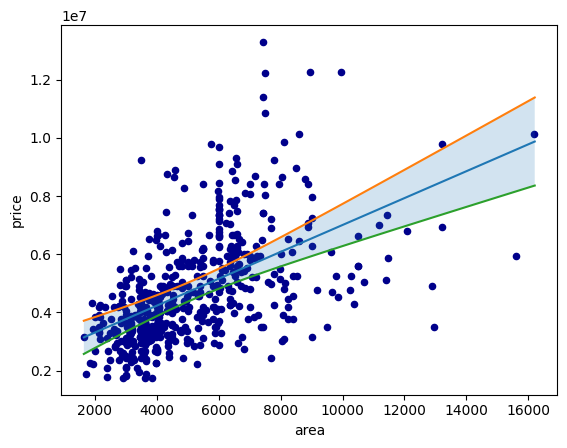

In [70]:



x=Symbol('x')

def regresion_lineal(df, variable_predictora, columna_respuesta, x_predecir = None, confianza = 0.95, imprimir = True):

    media_datos = df[variable_predictora].mean()
    media_prediccion = df[columna_respuesta].mean()
    x = df[variable_predictora]
    y = df[columna_respuesta]
    covarianza = 0
    varianza_muestral_x = 0
    n = len(x)
    for i in range(n):
        covarianza += (x[i] - media_datos) * (y[i] - media_prediccion)
        varianza_muestral_x += (x[i] - media_datos)**2

    media_x = x.mean()

    covarianza /= n
    varianza_muestral_x /= n


    if imprimir:
        puntos_x = list(np.linspace(min(df[variable_predictora]) - 10, max(df[variable_predictora]) + 10, 100))
        puntos_y = [(covarianza/varianza_muestral_x) * (x_predecir - media_datos) + media_prediccion for x_predecir in puntos_x]
        
        nx = len(puntos_x)

        xi_mediax = []
        for i in range(nx):
            xi_mediax.append((puntos_x[i] - media_x)**2)

        # cuadrado de los y - y_gorro
        suma_residuos_al_cuadrado = sum([(y[i] - ((covarianza/varianza_muestral_x) * (x[i] - media_datos) + media_prediccion))**2 for i in range(n)])
        
        margenes = []
        for i in range(nx):
            multiplicacion = sqrt(suma_residuos_al_cuadrado/(n-2) * (1/n + (xi_mediax[i]/sum(xi_mediax))))
            margenes.append(abs(t.isf(confianza, df = n - 2)) * multiplicacion)

        df.plot.scatter(x=variable_predictora,
                        y=columna_respuesta,
                        c='DarkBlue')
        plt.plot(puntos_x, puntos_y)

        y_arriba = [puntos_y[i] + margenes[i] for i in range(nx)]
        y_abajo = [puntos_y[i] - margenes[i] for i in range(nx)]

        plt.plot(puntos_x, y_arriba)
        plt.plot(puntos_x, y_abajo)
        plt.fill_between(puntos_x, y_arriba, y_abajo, alpha=0.2)
        plt.show()
    if x_predecir != None:
        return (covarianza/varianza_muestral_x) * (x_predecir - media_datos) + media_prediccion

regresion_lineal(df, 'area', 'price', confianza=0.999999, imprimir=True)

In [63]:
df = pd.read_csv('casas.csv')

In [64]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [37]:
abs(t.isf(0.995, 2))

9.92484320091807

6.5 Script sobre validación cruzada

Programa un script que reciba como datos de entrada un data.frame de dos columnas, un
número p entre 0 y 1, y un número entero k y realice Monte Carlo Cross Validation k veces con
porcentaje p de la muestra reservado para test.
El script debe dibujar un boxplot de los valores de R2 del test, devolver el R2 medio del
test y el intervalo de confianza al 95% para este valor (en la versión de Bengio - Nadeau).
Opcional(i.e. no se requiere para la entrega de ejercicios): Haz que el programa devuelva
también un p-valor simulado mediante el test de permutaciones

In [38]:
df = pd.read_csv('casas.csv')
df = df.sample(50)

(0.04798385456642253, [-0.02869816679938792, 0.124665875932233])

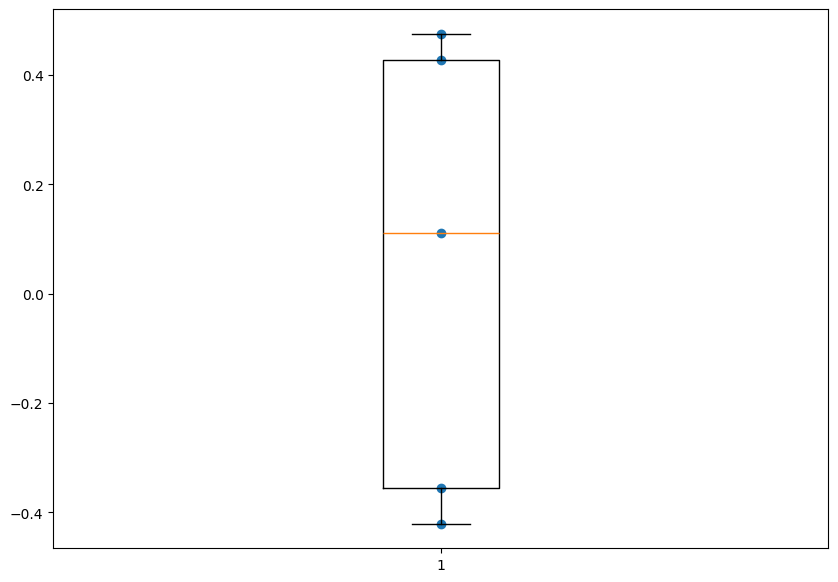

In [39]:


def validacion_cruzada(df, p, k, columna_datos = 'x', columna_predicion = 'y'):

    """
        La diferencia de Monte Carlo Cross Validation es que a la hora de hacer las divisiones no tenemos porque escoger cada dato una vez
    """

    R2 = []
    for i in range(k):
        num_seleccion = round(p * len(df))
        train = df.sample(num_seleccion).copy()
        test = df.drop(list(train.index), axis = 0)

        r2 = -1
        train.reset_index(drop = True, inplace = True)
        test.reset_index(drop = True, inplace = True)
        numerador = 0
        denominador = 0
        reg = LinearRegression()
        for j in range(len(test)):
            prediccion = regresion_lineal(train, columna_datos, columna_predicion, \
                                          x_predecir=test.iloc[j, :][columna_datos], imprimir = False)
            reg.fit(np.array(train[columna_datos]).reshape(-1, 1), np.array(train[columna_predicion]).reshape(-1, 1))
            numerador += (test.iloc[j, :][columna_predicion] - prediccion)**2
            denominador += (test.iloc[j, :][columna_predicion] - test[columna_predicion].mean())**2
        r2 = 1 - numerador/denominador

        predicciones = reg.predict(np.array([test[columna_datos]]).reshape(-1, 1))

        R2.append(r2)

    R2_medio = np.array(R2).mean()

    a = t.ppf(1 - p/2, k - 1)
    cuasidesviacion_tipica_R2 = 0
    for valor in R2:
        cuasidesviacion_tipica_R2 += (valor - R2_medio)**2 / (k-1)
    cuasidesviacion_tipica_R2 = cuasidesviacion_tipica_R2 ** 0.5

    intervalo_confianza = [R2_medio - a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5, \
                           R2_medio + a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5]

    fig = plt.figure(figsize = (10, 7))

    plt.boxplot(R2)
    plt.scatter([1]*len(R2), R2)
    return R2_medio, intervalo_confianza


validacion_cruzada(df, 0.8, 5, columna_datos='area', columna_predicion='price')

6.6 Script de regresión y CV de sklearn

Repite el ejercicio anterior usando la librería sklearn y funciones como train_test_split o
r2_score de la clase metrics, o KFold de model_selection.

(0.2607208641820907, [-0.12172222111094338, 0.6431639494751247])

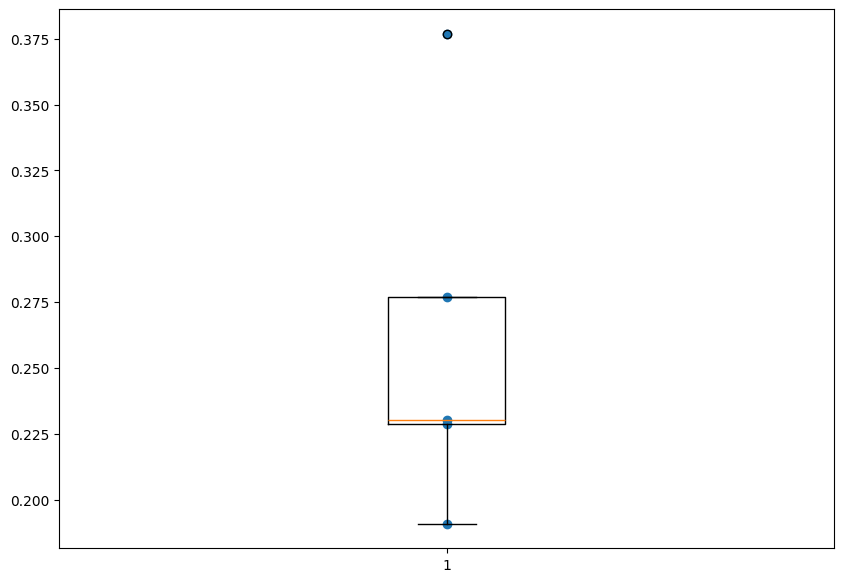

In [51]:



# ES PARA PROBAR LAS DOS
"""
    Preguntar porque una cosa es kfold y otra cosa es montecarlo cross validation
"""

df = pd.read_csv('casas.csv')
def validacion_cruzada_montecarlo(df, p, k, columna_datos = 'x', columna_prediccion = 'y'):

    R2 = []
    num_elementos_pliegue = int(len(df) / k)
    for i in range(k):
        df_copia = df.sample(num_elementos_pliegue)
        X_train, X_test, y_train, y_test = train_test_split(np.array(df_copia[columna_datos]), \
                                                            np.array(df_copia[columna_prediccion]), test_size=p)
        reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
        predicciones = reg.predict(X_test.reshape(-1, 1))
        R2.append(r2_score(y_test, predicciones))


    R2_medio = np.array(R2).mean()

    a = t.ppf(1 - p/2, k - 1)
    cuasidesviacion_tipica_R2 = 1
    for valor in R2:
        cuasidesviacion_tipica_R2 += (valor - R2_medio)**2 / (k-1)
    cuasidesviacion_tipica_R2 = cuasidesviacion_tipica_R2 ** 0.5


    intervalo_confianza = [R2_medio - a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5, R2_medio \
                           + a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5]


    fig = plt.figure(figsize = (10, 7))

    plt.boxplot(R2)
    plt.scatter([1] * len(R2), R2)

    return R2_medio, intervalo_confianza



def validacion_cruzada_normal(df, p, k, columna_datos = 'x', columna_prediccion = 'y'):
    R2 = []

    kf = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kf.split(df):
        X_train, X_test = df[columna_datos].iloc[train_index], df[columna_datos].iloc[test_index]
        y_train, y_test = df[columna_prediccion].iloc[train_index], df[columna_prediccion].iloc[test_index]

        reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
        predicciones = reg.predict(X_test.values.reshape(-1, 1))
        R2.append(r2_score(y_test, predicciones))

    R2_medio = np.mean(R2)

    a = t.ppf(1 - p/2, k - 1)
    cuasidesviacion_tipica_R2 = 1
    for valor in R2:
        cuasidesviacion_tipica_R2 += (valor - R2_medio)**2 / (k-1)
    cuasidesviacion_tipica_R2 = cuasidesviacion_tipica_R2 ** 0.5


    intervalo_confianza = [R2_medio - a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5, R2_medio \
                            + a * cuasidesviacion_tipica_R2 * (1/k + 1/(k-1))**0.5]

    fig = plt.figure(figsize = (10, 7))

    plt.boxplot(R2)
    plt.scatter([1] * len(R2), R2)

    return R2_medio, intervalo_confianza


validacion_cruzada_montecarlo(df, 0.6, 5, 'area', 'price')

(0.28652453234045006, [-0.09563877488857853, 0.6686878395694786])

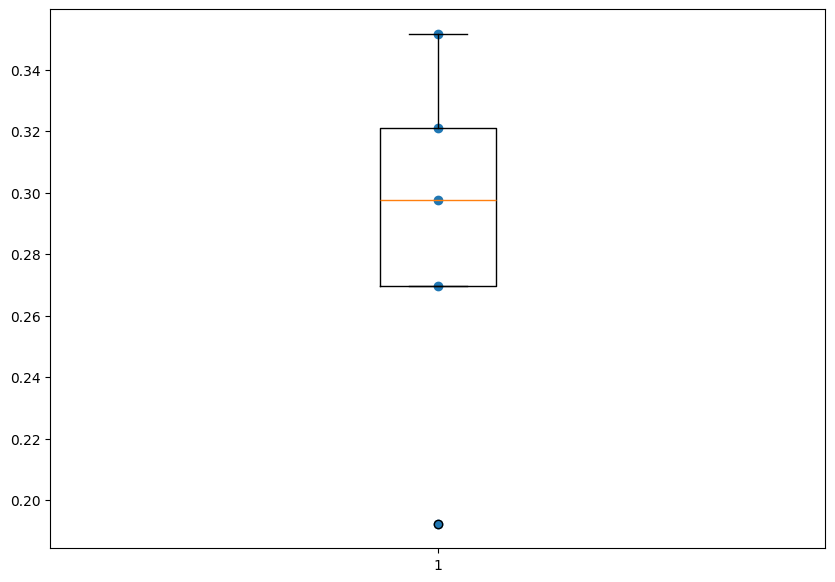

In [52]:
validacion_cruzada_normal(df, 0.6,  5, 'area', 'price')

6.8 Regresión polinómica

Usando los paquetes y funciones que consideres (por ejemplo: preprocessing.MinMaxScaler,
preprocessing.PolynomialFeatures o linear_model.LinearRegression de sklearn) para
los datos casas.csv, crea regresiones polinómicas de grados 1, 2, 3, 4, 6, 10 y 20. ¿Cuál es la
mejor? ¿Merecería la pena seguir probando con grados más elevados?

In [42]:



df = pd.read_csv('./casas.csv')

columnas_yes_no = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for columna in columnas_yes_no:
    df[columna] = df[columna].map(dict(yes=1, no=0))

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished' : 2, 'semi-furnished':1, 'unfurnished':0})

scaler = MinMaxScaler()
scaler.fit(df)
df[df.columns] = scaler.transform(df[df.columns])

y = df['price']
X = df.drop('price', axis = 1)

n = [1, 2, 3, 4, 6, 10, 20]

for i in n:
    poly = PolynomialFeatures(degree=i, interaction_only=True, include_bias=False).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    prediciones = reg.predict(X_test)
    print(i, 'R2',  r2_score(y_test, prediciones), 'MSE', mean_squared_error(y_test, prediciones))

"""
La mejor es la regresión de grado 1 ya que comete el menor error cuadratico y tiene el mejor R2 
de todos ya que a mayor grado mayor es la probabilidad de cometer overfitting que es lo que vemos 
que ocurre por tanto no merece la pena seguir probando grados mayores

"""



1 R2 0.6494754192267793 MSE 0.013281243729270743
2 R2 -3.7544492333289797e+25 MSE 1.4225466079161012e+24
3 R2 -0.5639732714974246 MSE 0.05925835545970108
4 R2 -522.396549711278 MSE 19.831297218702563
6 R2 -194.86696265481143 MSE 7.42132510020324
10 R2 -195.0350825752153 MSE 7.4276951003718565
20 R2 -195.03473095232414 MSE 7.427681777513561


'\nLa mejor es la regresión de grado 1 ya que comete el menor error cuadratico y tiene el mejor R2 de todos ya que a mayor grado mayor es la probabilidad de cometer overfitting que es lo que vemos que ocurre\npor tanto no merece la pena seguir probando grados mayores\n\n'

6.9 Trabajando con datos reales de AURORA

Varios miembros de la ETSISI participan en AURORA, un proyecto europeo para lanzar una
comunidad energética en el Campus Sur. Han desarrollado esta app, en la que los usuarios
pueden introducir su consumo energético, para así establecer perfiles y dar recomendaciones
para reducir el gasto, así como realizar investigaciones en posibles formas de contribuir a reducir
la huella de carbono de la sociedad.
Trabaja sobre el conjunto de datos consumos AURORA. Este es un data set real extraído de
la APP y casi sin pre-procesar.


a) ¿Existe una diferencia significativa entre el consumo por persona en agosto en mayo y en
diciembre? ¿Y si nos fijamos sólo en el consumo generado debido al transporte?
b) Realiza una regresión polinómica que modele el consumo total de los usuarios por meses.
c) Haz lo mismo, por tipos de consumo.
Puedes usar todas las librerías y funciones que consideres. En concreto te vendrán bien,
.groupby y .agg.

In [73]:

data = pd.read_excel("consumptions.xlsx")


mayo = data[data['createdAt'].dt.month == 5]
agosto = data[data['createdAt'].dt.month == 8]
diciembre = data[data['createdAt'].dt.month == 12]

consumo_m = mayo.groupby('userID')['energyExpended'].sum()
consumo_a = agosto.groupby('userID')['energyExpended'].sum()
consumo_d = diciembre.groupby('userID')['energyExpended'].sum()


In [107]:
consumo_m

userID
1CeuCuis4hhD4THmje7AcIlR1Gj1     41.666667
4eE7Av9vScWRSnzI7sSsria62wm1    309.090000
E1QXJuj8PFhiaTwoMGLgaeLxcZk1     12.500000
MX9eqTTym2MzddL53baFQlWNAS22      0.609188
jFyjrW4Izdhb8feEKcSKSluSabn2    869.821783
skKadZtCXnRFxcDwWotdj2qfRSL2     86.724000
yqR94mix6LPfbtw9ln04ORA9DrM2    126.559600
Name: energyExpended, dtype: float64

In [108]:
consumo_d

userID
2hmXERi164bcLuO0RgWyLfjiKHb2     254.000000
3rR3rVw4ttgU2ku6BsBVcIDYFpz1    3031.997204
4fTK6ITCQcg36XZANBYrWGYGCTy1    1627.574400
56qeZGuGoFRWdppBSvS3IfRp6it2     196.850000
5pimvdzcsqTnZFbVdmkPDuWRPhJ3     304.128280
                                   ...     
yDpFNtvy1rf5pHJIOeFD9dg9tB33      47.558080
yI7FbkA6ULNOf6oYU496HM6Yuoy2     123.253000
yUjuXoJfwlWkSkZvS5PMhrtYteC3      19.065000
zAWZaErznMVaIgJ8jAhgrP7TX6s2      87.500000
zAzbnGHc9aOQaE07YEuzfYqYFA32     222.656480
Name: energyExpended, Length: 71, dtype: float64

In [109]:
consumo_a

userID
Fm8PeiPHNVUtwFy8W3g3btxLNzz1     198.514700
YEoU4RvwbLhjRM6QTnPZq5eGoG52    1225.396600
cItpO6islgNEU3CR7QM8zrMiyRl1       0.000000
jFyjrW4Izdhb8feEKcSKSluSabn2     747.334633
l1slU1ayEjev8KNlAvzkwmq1aol2     485.211920
xk0gKqnpdFPKEFUXoWYOHZtlOIH2     745.880000
yUjuXoJfwlWkSkZvS5PMhrtYteC3      19.484843
Name: energyExpended, dtype: float64

In [110]:
# ASUMIMOS QUE TIENEN VARIANZA Y N DISTINTAS


data = pd.read_excel("consumptions.xlsx")

mayo = data[data['createdAt'].dt.month == 5]
agosto = data[data['createdAt'].dt.month == 8]
diciembre = data[data['createdAt'].dt.month == 12]

consumo_m = mayo.groupby('userID')['energyExpended'].sum()
consumo_a = agosto.groupby('userID')['energyExpended'].sum()
consumo_d = diciembre.groupby('userID')['energyExpended'].sum()

def welchts(consumo1, consumo2):
    media1 = consumo1.mean()
    media2 = consumo2.mean()
    numerador = media1 - media2

    n1 = len(consumo1)
    n2 = len(consumo2)

    sn11_2 = 0
    for i in consumo1:
        sn11_2 += (i - media1)**2
    sn11_2 /= (n1 - 1)

    sn21_2 = 0
    for i in consumo2:
        sn21_2 += (i - media2)**2
    sn21_2 /= (n2 - 1)

    denominador = sqrt(sn11_2/n1 + sn21_2/n2)
    numerador / denominador

    d_numerador = (sn11_2/n1 + sn21_2 / n2)**2
    d_denominador =  ((sn11_2/n1)**2/(n1-1)) + ((sn21_2/n2)**2/(n2-1))

    numerador/denominador, d_numerador/ d_denominador
    d = d_numerador / d_denominador
    p_valor = t.sf(numerador/ denominador, d)

    if p_valor < 0.05:
        print(f'Existen diferencias significativas en el consumo, p_valor = {p_valor}')
    else:
        print(f'No existen diferencias significativas en el consumo, p_valor = {p_valor}')

print('Mayo - Diciembre')
welchts(consumo_m, consumo_d)
print('Agosto - Diciembre')
welchts(consumo_a, consumo_d)
print('Mayo - Agosto')
welchts(consumo_m, consumo_a)

Mayo - Diciembre
No existen diferencias significativas en el consumo, p_valor = 0.8417068248974806
Agosto - Diciembre
No existen diferencias significativas en el consumo, p_valor = 0.840478107929812
Mayo - Agosto
No existen diferencias significativas en el consumo, p_valor = 0.8996102412634673


In [111]:


# repetimos para las columnas category = transportation

data_transp = data[data['category'] == 'transportation']
mayo_transp = data_transp[data_transp['createdAt'].dt.month == 5]
agosto_transp = data_transp[data_transp['createdAt'].dt.month == 8]
diciembre_transp = data_transp[data_transp['createdAt'].dt.month == 12]

consumo_m_trasp = mayo_transp.groupby('userID')['energyExpended'].sum()
consumo_a_trasp = agosto_transp.groupby('userID')['energyExpended'].sum()
consumo_d_trasp = diciembre_transp.groupby('userID')['energyExpended'].sum()


print('Mayo - Diciembre')
welchts(consumo_m_trasp, consumo_d_trasp)
print('Agosto - Diciembre')
welchts(consumo_a_trasp, consumo_d_trasp)
print('Mayo - Agosto')
welchts(consumo_m_trasp, consumo_a_trasp)

Mayo - Diciembre
No existen diferencias significativas en el consumo, p_valor = 0.9739597409376175
Agosto - Diciembre
No existen diferencias significativas en el consumo, p_valor = 0.7154724538737736
Mayo - Agosto
No existen diferencias significativas en el consumo, p_valor = 0.8966934910623158


Grado del polinomio: 2
R^2 en el conjunto de entrenamiento: 0.8706789963466742
R^2 en el conjunto de prueba: -708.824429956536


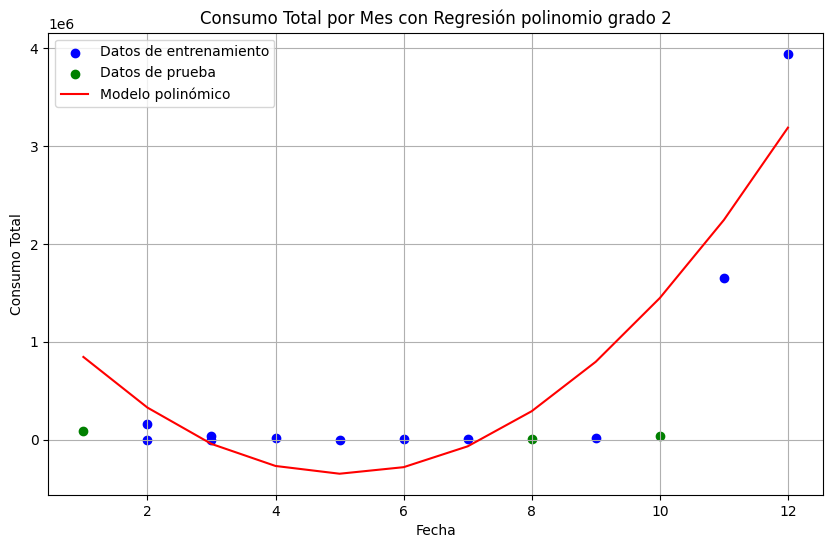

Grado del polinomio: 3
R^2 en el conjunto de entrenamiento: 0.9742562889823734
R^2 en el conjunto de prueba: -301.31372242925585


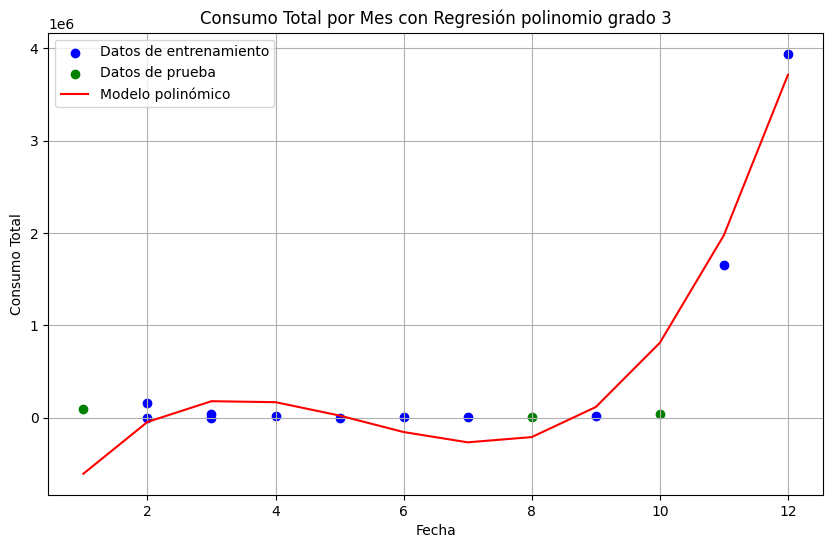

Grado del polinomio: 4
R^2 en el conjunto de entrenamiento: 0.9983881973958422
R^2 en el conjunto de prueba: -120.39291595395841


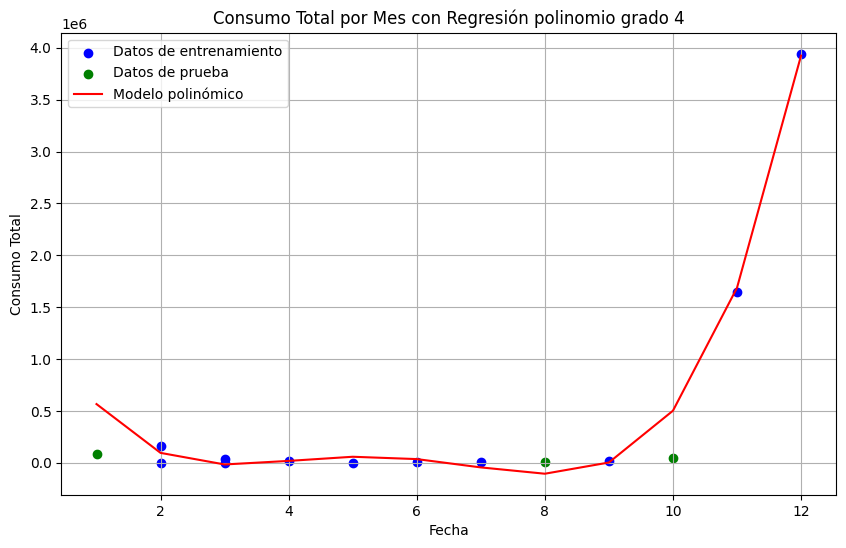

Grado del polinomio: 5
R^2 en el conjunto de entrenamiento: 0.9989582938336337
R^2 en el conjunto de prueba: -62.55734470460501


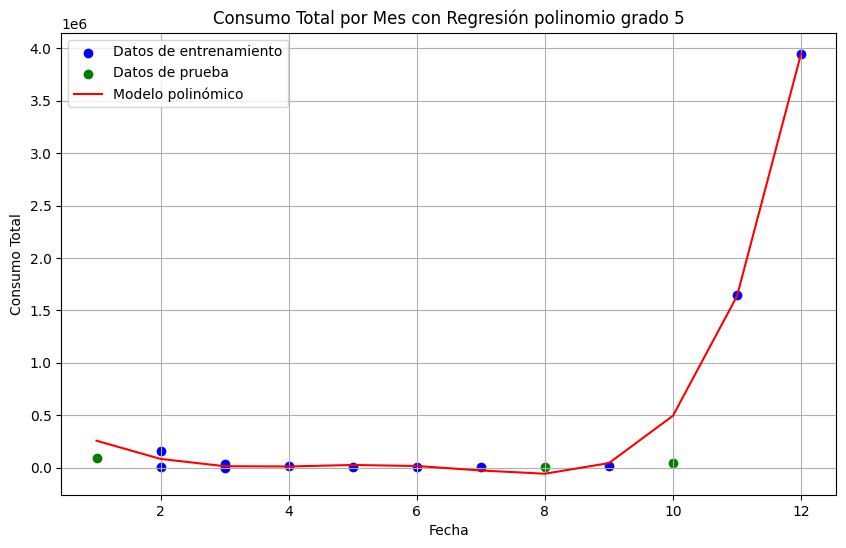

In [126]:
# obtenemos el gasto total por mes y año
data['month'] = data['createdAt'].dt.month
consumo_mensual = data.groupby(['month', 'year'])['energyExpended'].sum().reset_index()

# entrenamos el modelo
x = consumo_mensual['month'].values.reshape(-1, 1)
y = consumo_mensual['energyExpended']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


for degree in range(2, 6):
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(x_train, y_train)

    y_train_pred = polynomial_model.predict(x_train)
    y_test_pred = polynomial_model.predict(x_test)
    
    print(f"Grado del polinomio: {degree}")
    print(f"R^2 en el conjunto de entrenamiento: {r2_score(y_train, y_train_pred)}")
    print(f"R^2 en el conjunto de prueba: {r2_score(y_test, y_test_pred)}")
    y_pred = polynomial_model.predict(x)
    
    # Ploteamos la regresión
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Datos de entrenamiento')
    plt.scatter(x_test, y_test, color='green', label='Datos de prueba')
    plt.plot(x, y_pred, color='red', label='Modelo polinómico')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo Total')
    plt.title(f'Consumo Total por Mes con Regresión polinomio grado {degree}')
    plt.legend()
    plt.grid(True)
    plt.show()

Grado del polinomio: 2
R^2 en el conjunto de entrenamiento: 0.3316903059722549
R^2 en el conjunto de prueba: 0.9418381855052135


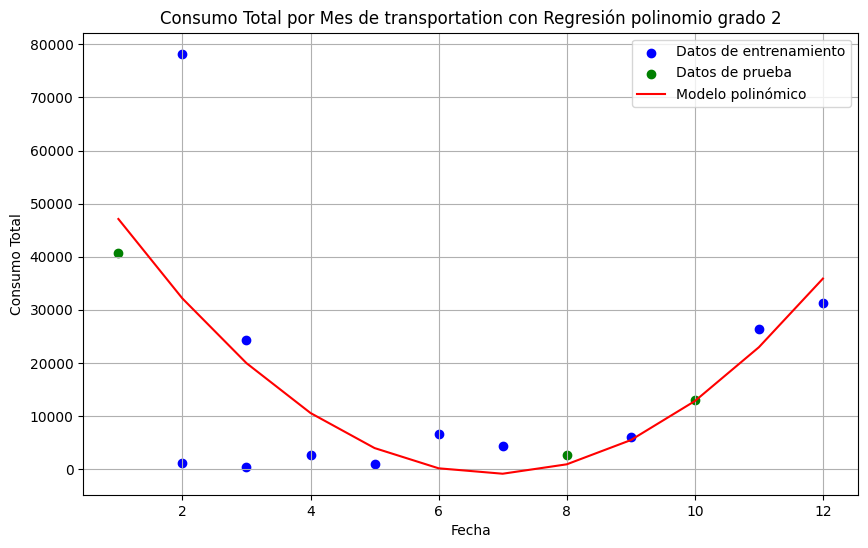

Grado del polinomio: 3
R^2 en el conjunto de entrenamiento: 0.36755262644384246
R^2 en el conjunto de prueba: 0.2529917836166845


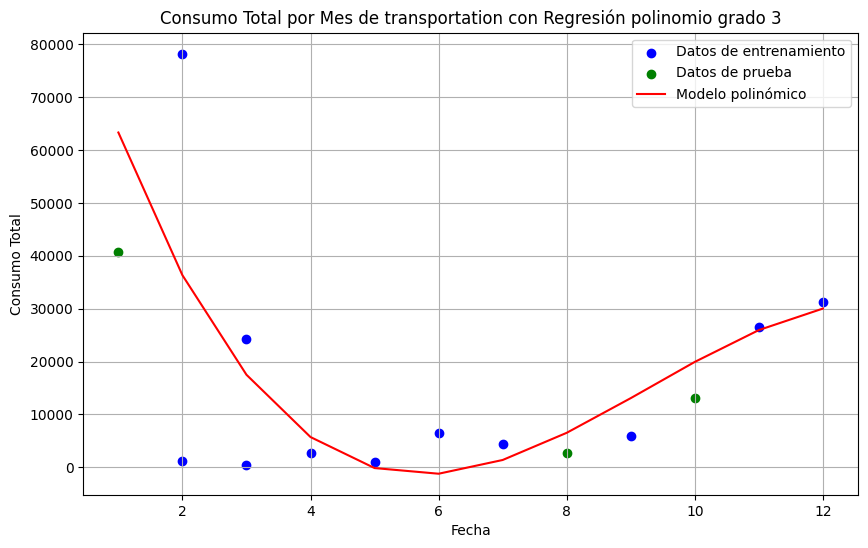

Grado del polinomio: 4
R^2 en el conjunto de entrenamiento: 0.3885672874862226
R^2 en el conjunto de prueba: -1.4916999518715484


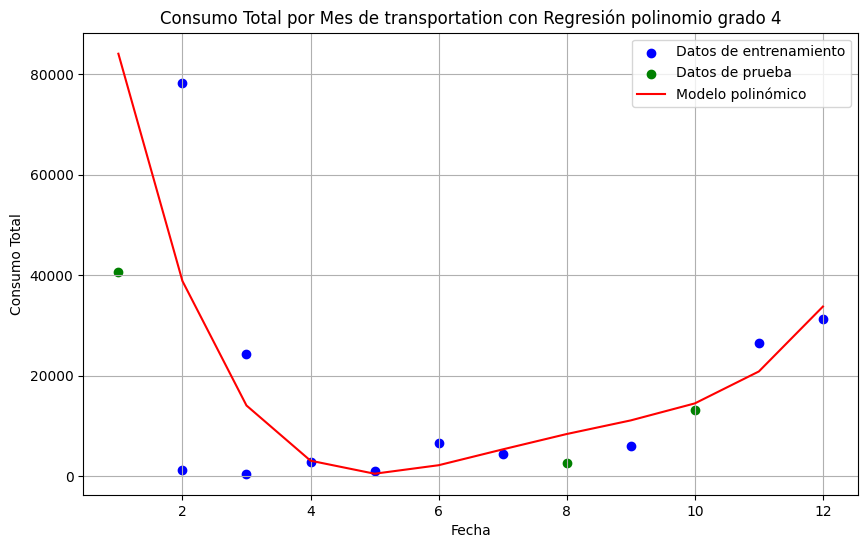

Grado del polinomio: 5
R^2 en el conjunto de entrenamiento: 0.40178568227576617
R^2 en el conjunto de prueba: -5.681882468339671


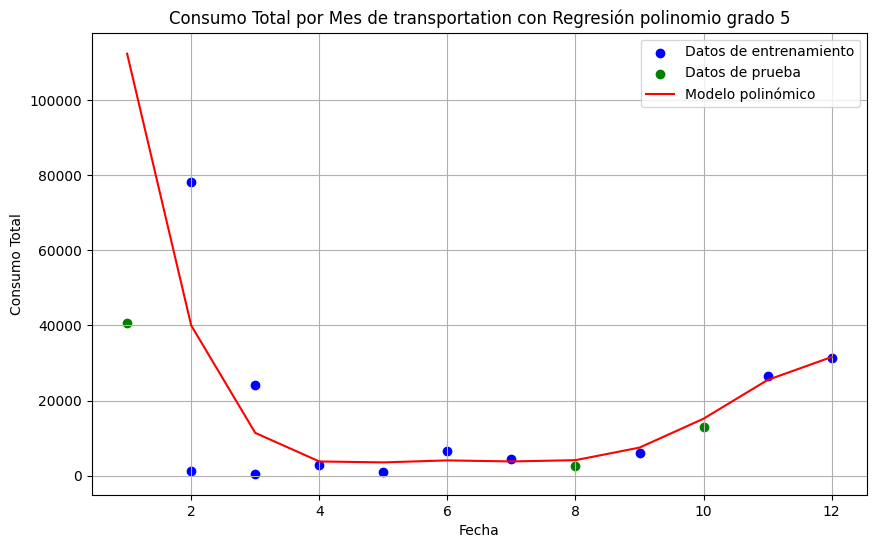

Grado del polinomio: 2
R^2 en el conjunto de entrenamiento: 0.21167136508575768
R^2 en el conjunto de prueba: 0.4085617272942348


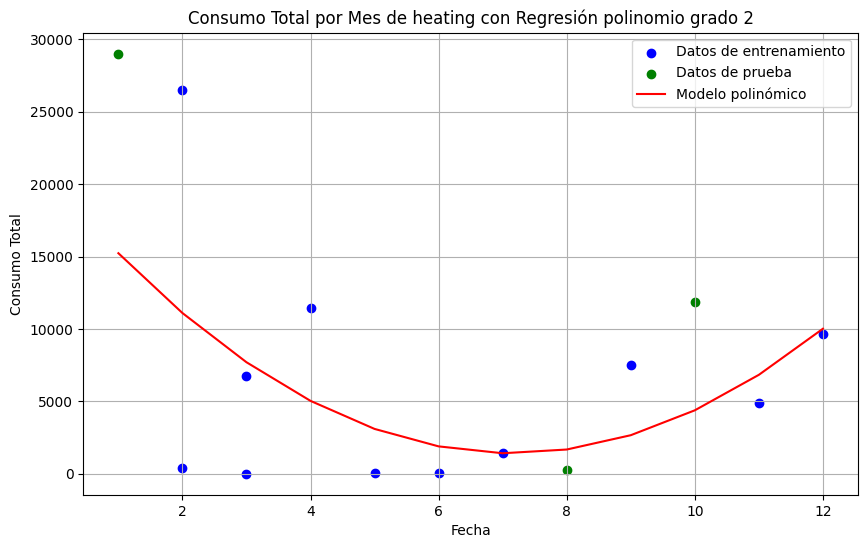

Grado del polinomio: 3
R^2 en el conjunto de entrenamiento: 0.23918327136390893
R^2 en el conjunto de prueba: 0.7166162182782502


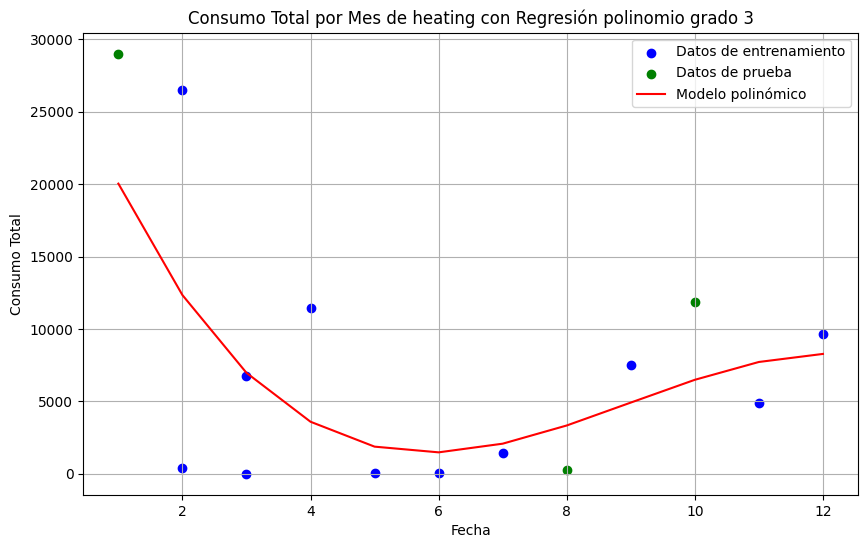

Grado del polinomio: 4
R^2 en el conjunto de entrenamiento: 0.2424168334750162
R^2 en el conjunto de prueba: 0.7930859444642544


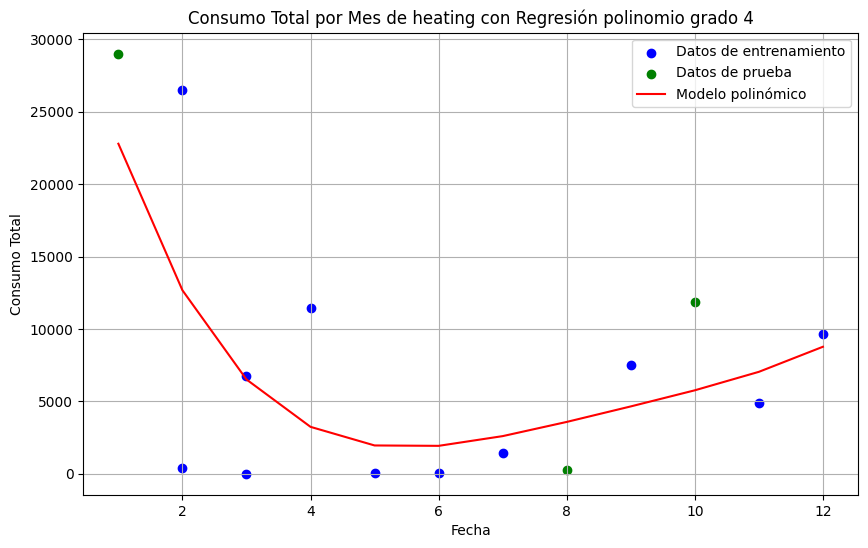

Grado del polinomio: 5
R^2 en el conjunto de entrenamiento: 0.2431249106639749
R^2 en el conjunto de prueba: 0.708361578214674


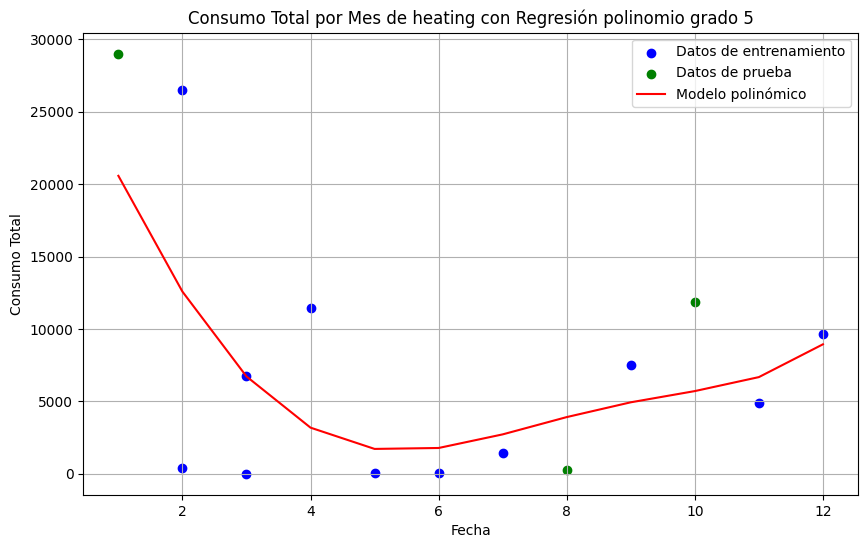

Grado del polinomio: 2
R^2 en el conjunto de entrenamiento: 0.8676519547446336
R^2 en el conjunto de prueba: -11657.5238003306


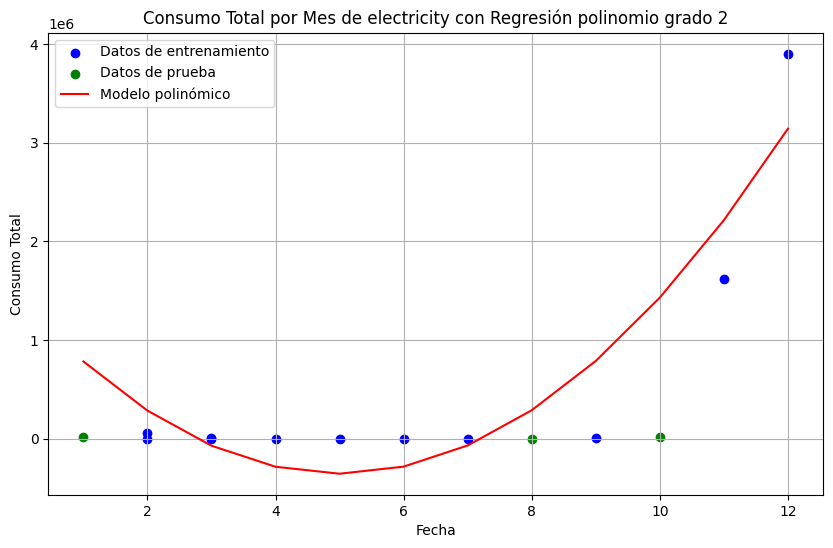

Grado del polinomio: 3
R^2 en el conjunto de entrenamiento: 0.9755700715150841
R^2 en el conjunto de prueba: -4990.027566450098


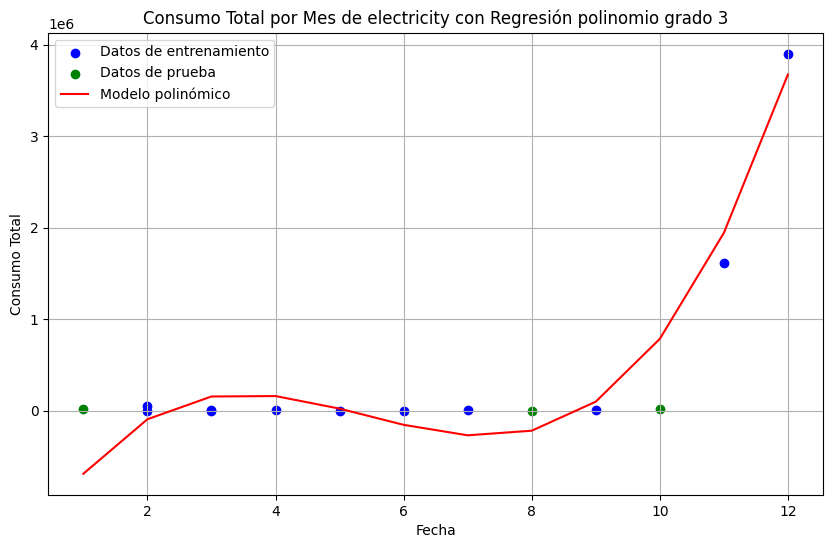

Grado del polinomio: 4
R^2 en el conjunto de entrenamiento: 0.9990321159761543
R^2 en el conjunto de prueba: -1846.7174531202281


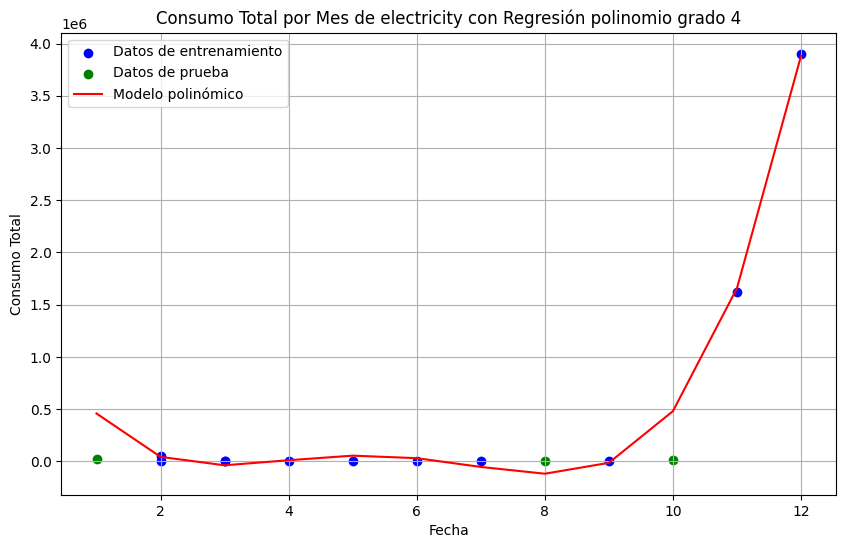

Grado del polinomio: 5
R^2 en el conjunto de entrenamiento: 0.9997104889092814
R^2 en el conjunto de prueba: -973.9697522466067


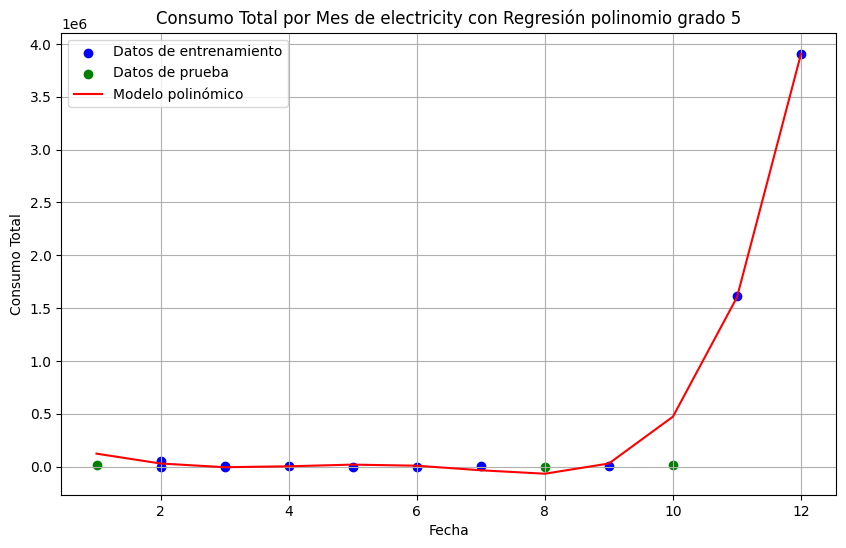

"\nLa regresión polinómica para 'transportation' y 'heating' devuelven un buen resultado en\ngeneral, pero para 'electricity' vemos el mismo problema que el apartado anterior, y es\nque la regresión con polinomios de grado 4 y 5 están haciendo overfitting\n"

In [128]:

# obtenemos el gasto total por mes, año y tipo
consumo_mensual_tipo = data.groupby(['month', 'year', 'category'])['energyExpended'].sum().reset_index()

for tipo in data['category'].unique():
    consumo_mensual_tip = consumo_mensual_tipo[consumo_mensual_tipo['category'] == tipo]

    # hacemos lo mismo que antes
    x = consumo_mensual_tip['month'].values.reshape(-1, 1)
    y = consumo_mensual_tip['energyExpended']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    for degree in range(2, 6):

        polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polynomial_model.fit(x_train, y_train)
    

        y_train_pred = polynomial_model.predict(x_train)
        y_test_pred = polynomial_model.predict(x_test)
        
        print(f"Grado del polinomio: {degree}")
        print(f"R^2 en el conjunto de entrenamiento: {r2_score(y_train, y_train_pred)}")
        print(f"R^2 en el conjunto de prueba: {r2_score(y_test, y_test_pred)}")


        # Predecimos para todos los datos
        y_pred = polynomial_model.predict(x)
        
        # Ploteamos la regresión
        plt.figure(figsize=(10, 6))
        plt.scatter(x_train, y_train, color='blue', label='Datos de entrenamiento')
        plt.scatter(x_test, y_test, color='green', label='Datos de prueba')
        plt.plot(x, y_pred, color='red', label='Modelo polinómico')
        plt.xlabel('Fecha')
        plt.ylabel('Consumo Total')
        plt.title(f'Consumo Total por Mes de {tipo} con Regresión polinomio grado {degree}')
        plt.legend()
        plt.grid(True)
        plt.show()

'''
La regresión polinómica para 'transportation' y 'heating' devuelven un buen resultado en
general, pero para 'electricity' vemos el mismo problema que el apartado anterior, y es
que la regresión con polinomios de grado 4 y 5 están haciendo overfitting
'''

Varios miembros de la ETSISI participan en AURORA, un proyecto europeo para lanzar una
comunidad energética en el Campus Sur. Han desarrollado esta app, en la que los usuarios
pueden introducir su consumo energético, para así establecer perfiles y dar recomendaciones
para reducir el gasto, así como realizar investigaciones en posibles formas de contribuir a reducir
la huella de carbono de la sociedad.
Trabaja sobre el conjunto de datos consumos AURORA. Este es un data set real extraído de
la APP y casi sin pre-procesar.


a) ¿Existe una diferencia significativa entre el consumo por persona en agosto en mayo y en
diciembre? ¿Y si nos fijamos sólo en el consumo generado debido al transporte?
b) Realiza una regresión polinómica que modele el consumo total de los usuarios por meses.
c) Haz lo mismo, por tipos de consumo.
Puedes usar todas las librerías y funciones que consideres. En concreto te vendrán bien,
.groupby y .agg.

6.12 Script que te gana a sí o no

Se pide a una persona que teclee secuencias aleatorias de números que pueden ser el 0 o el 1; por
ejemplo, 01011100101001... Utiliza la regresión logística sobre los 10 sucesos anteriores para
predecir cuál va a ser el siguiente. ¿Eres capaz de hacer un script que prediga correctamente
lo que tú mismo vas a escribir por encima del 50% de las veces?

In [44]:


# probabilidad de ser la categoria 1
# se hace regresion lineal y se cambia la salida

def prediccion_0_1(sucesos_anteriores):
    reg = LogisticRegression().fit(np.array(sucesos_anteriores[:-1]).reshape(-1, 1), \
                                   np.array(sucesos_anteriores[1:]).reshape(-1, 1))
    return reg.predict(np.array(sucesos_anteriores[-1]).reshape(-1, 1))

i = 0
bien = 0
sucesos = []
while True:

    if len(sucesos) >= 10:
        prediccion = prediccion_0_1(sucesos[-10:])

    sucesos.append(int(input('Introduzca un 0 o un 1: ')))
    i += 1
    if len(sucesos) > 10:
        print(f'Ha predicho {prediccion} y ha acertado: {prediccion == sucesos[-1]}')
        if sucesos[-1] == prediccion:
            bien += 1
            print(f"Ha acertado el {bien/i * 100}%")

"""
    En general suele acertar muy bien y ya si usas un patrón más pequeño que 10 suele llegar al 100% de acierto
"""

ValueError: invalid literal for int() with base 10: ''

6.13 Curse of dimensionality

Genera 10.000 puntos en R
2
con valores x ∈ [0, 1] e y ∈ [0, 1] distribuidos uniformemente
(si los cálculos fueran demasiado costosos computacionalmente, reduce el número de puntos).
Calcula las distancias euclídeas entre cada uno de ellos realizando un doble bucle for. Realiza
un histograma de las distancias obtenidas.
Repite estos cálculos para puntos generados en 3, 10, 100, 1.000 y 10.000 dimensiones.
Deberías obtener una figura similar a la que se muestra a continuación. ¿Qué quiere decir esto
sobre la distribución de las distancias en altas dimensiones?

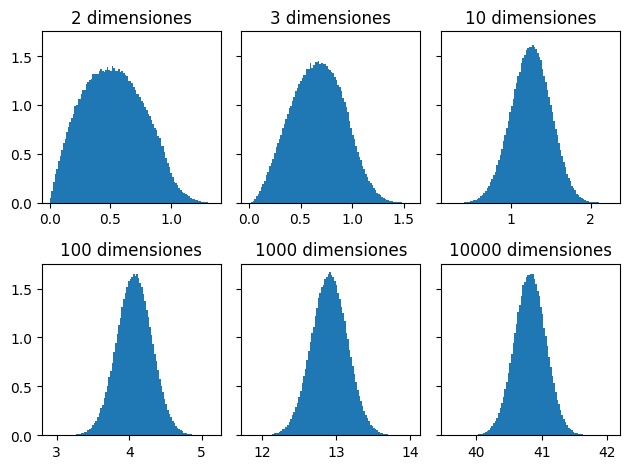

'\n\n    En dimensiones altas las distancias entre puntos tienden a ser más uniformes y a agruparse alrededor de ciertos valores. Esto hace más difícil distinguir entre puntos cercanos y lejanos\n'

In [45]:


def array_aleatorio_puntos(num_dimensiones, num_puntos):

    Puntos = [np.random.uniform(low = 0, high = 1, size = num_dimensiones) for i in range(num_puntos)]

    distancias = []
    for indice1 in range(len(Puntos)):
        for indice2 in range(len(Puntos)):
            if indice1 != indice2:
                distancias.append(np.linalg.norm(Puntos[indice1] - Puntos[indice2]))

    return np.array(distancias)


fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)

dim = [2, 3, 10, 100, 1000, 10000]

for i, valor in enumerate(dim):
    fila = 0
    columna = i
    if i > 2:
        fila = 1
        columna -= 3
    else:
        fila = 0
    histograma = array_aleatorio_puntos(valor, 1000)


    axs[fila, columna].hist(histograma, density = True, bins = 100)
    axs[fila, columna].set_title(f'{valor} dimensiones')
    #axs[fila, columna].set_xlim(0, sqrt(valor))


plt.show()
"""
    En dimensiones altas las distancias entre puntos tienden a ser más uniformes y a agruparse alrededor de 
    ciertos valores. Esto hace más difícil distinguir entre puntos cercanos y lejanos
"""
